
# Neural Networks: Multiple Inputs and Outputs (PyTorch Implementation)
This notebook is inspired by the video [Neural Networks Pt. 4: Multiple Inputs and Outputs](https://www.youtube.com/watch/83LYR-1IcjA) from StatQuest by Josh Starmer. 
It provides a comprehensive exploration of neural networks with multiple inputs and outputs, focusing on implementation using PyTorch.



## Implementation: Neural Network with Multiple Inputs and Outputs in PyTorch

### Step 1: Data Preparation
The iris dataset is commonly used for classification tasks. We'll normalize the input features for better performance.


In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the iris dataset
data = load_iris()
X = data.data[:, :2]  # Use only the first two features (sepal length and width)
y = data.target

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)



### Step 2: Defining the Neural Network
We'll define a simple feedforward neural network using PyTorch's `nn.Module`.


In [8]:

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Define the model
input_size = 2  # Two input features
hidden_size = 10  # Arbitrary hidden layer size
output_size = 3  # Three output classes for Setosa, Versicolor, Virginica
model = NeuralNetwork(input_size, hidden_size, output_size)



### Step 3: Training the Neural Network
We'll use cross-entropy loss and an Adam optimizer for training.


In [9]:

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/50], Loss: 1.0641
Epoch [20/50], Loss: 0.9904
Epoch [30/50], Loss: 0.8856
Epoch [40/50], Loss: 0.7716
Epoch [50/50], Loss: 0.6668



### Step 4: Evaluating the Model
We'll evaluate the model's accuracy on the test set.


In [10]:

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).float().mean()
    print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.93



## Understanding the Predictions

The predictions are based on the final layer's activations. These activations represent the probability distributions over the three classes. 


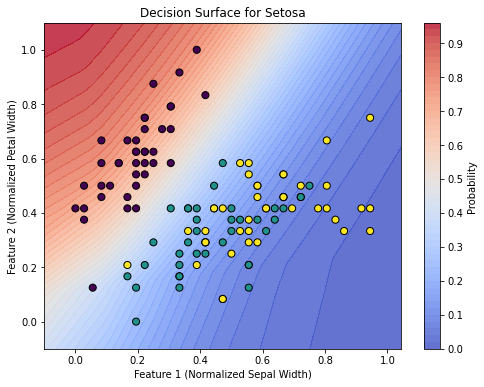

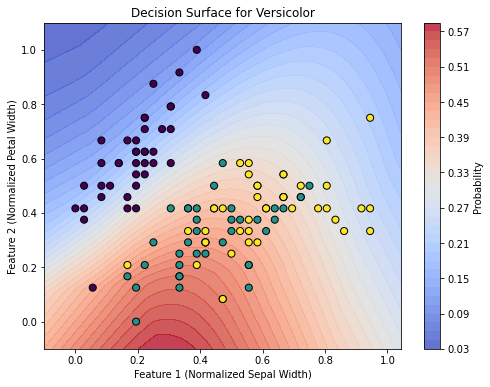

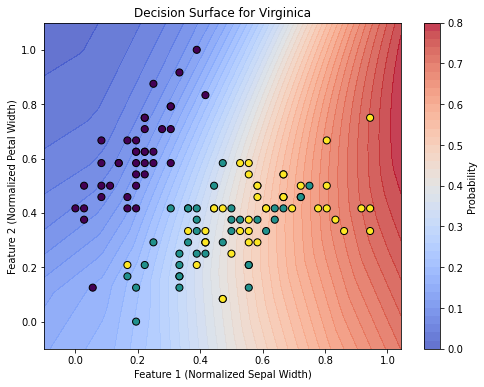

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model is already trained and X_train is the training data

# Define a grid for visualization
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten the grid and convert to tensor
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict probabilities for each point in the grid
with torch.no_grad():
    predictions = model(grid)
    probabilities = torch.softmax(predictions, dim=1).numpy()

# Reshape probabilities to match the grid shape
prob_setosa = probabilities[:, 0].reshape(xx.shape)
prob_versicolor = probabilities[:, 1].reshape(xx.shape)
prob_virginica = probabilities[:, 2].reshape(xx.shape)

# Visualization function
def plot_decision_surface(probabilities, title):
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, probabilities, levels=50, cmap="coolwarm", alpha=0.8)
    plt.colorbar(label="Probability")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap="viridis", s=50)
    plt.title(title)
    plt.xlabel("Feature 1 (Normalized Sepal Width)")
    plt.ylabel("Feature 2 (Normalized Petal Width)")
    plt.show()

# Plot decision surfaces
plot_decision_surface(prob_setosa, "Decision Surface for Setosa")
plot_decision_surface(prob_versicolor, "Decision Surface for Versicolor")
plot_decision_surface(prob_virginica, "Decision Surface for Virginica")


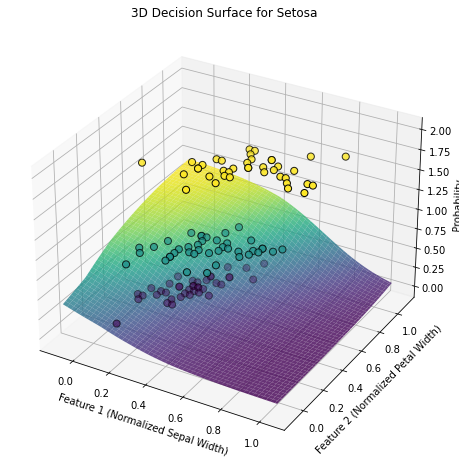

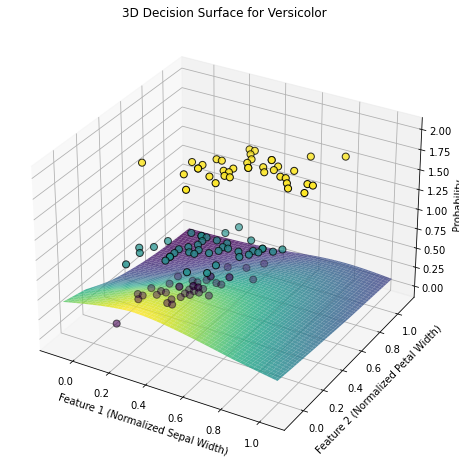

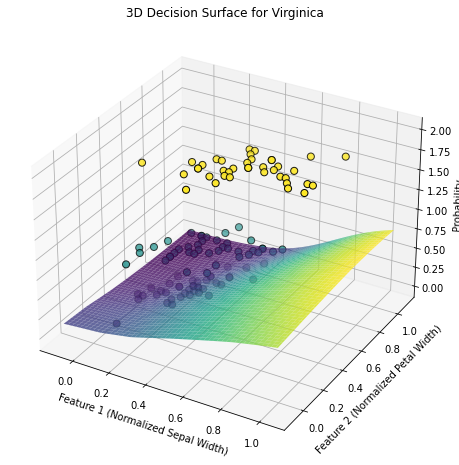

In [24]:
# Define a grid for visualization
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten the grid and convert to tensor
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict probabilities for each point in the grid
with torch.no_grad():
    predictions = model(grid)
    probabilities = torch.softmax(predictions, dim=1).numpy()

# Reshape probabilities to match the grid shape
prob_setosa = probabilities[:, 0].reshape(xx.shape)
prob_versicolor = probabilities[:, 1].reshape(xx.shape)
prob_virginica = probabilities[:, 2].reshape(xx.shape)

# Define the 3D visualization function
def plot_3d_decision_surface(probabilities, title, z_label):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface
    ax.plot_surface(xx, yy, probabilities, cmap="viridis", alpha=0.8)
    
    # Scatter plot for training data
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train.numpy(), c=y_train, cmap="viridis", edgecolor="k", s=50)
    
    ax.set_title(title)
    ax.set_xlabel("Feature 1 (Normalized Sepal Width)")
    ax.set_ylabel("Feature 2 (Normalized Petal Width)")
    ax.set_zlabel(z_label)
    plt.show()

# Plot decision surfaces in 3D
plot_3d_decision_surface(prob_setosa, "3D Decision Surface for Setosa", "Probability")
plot_3d_decision_surface(prob_versicolor, "3D Decision Surface for Versicolor", "Probability")
plot_3d_decision_surface(prob_virginica, "3D Decision Surface for Virginica", "Probability")


